# Libraries

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications import MobileNetV3Small

# Read dataset

In [ ]:
!unzip 'datasetTrashKRTMI.zip'

Archive:  datasetTrashKRTMI.zip
   creating: GarbageImages/test/
   creating: GarbageImages/test/botol_plastik/
  inflating: GarbageImages/test/botol_plastik/nvcamtest_7646_s00_00000.jpg  
  inflating: GarbageImages/test/botol_plastik/nvcamtest_7646_s00_00001.jpg  
  inflating: GarbageImages/test/botol_plastik/nvcamtest_7646_s00_00002.jpg  
  inflating: GarbageImages/test/botol_plastik/nvcamtest_7646_s00_00003.jpg  
  inflating: GarbageImages/test/botol_plastik/nvcamtest_7646_s00_00004.jpg  
  inflating: GarbageImages/test/botol_plastik/nvcamtest_7646_s00_00005.jpg  
  inflating: GarbageImages/test/botol_plastik/nvcamtest_7646_s00_00006.jpg  
  inflating: GarbageImages/test/botol_plastik/nvcamtest_7646_s00_00007.jpg  
  inflating: GarbageImages/test/botol_plastik/nvcamtest_7646_s00_00008.jpg  
  inflating: GarbageImages/test/botol_plastik/nvcamtest_7646_s00_00009.jpg  
  inflating: GarbageImages/test/botol_plastik/nvcamtest_7646_s00_00010.jpg  
  inflating: GarbageImages/test/botol_pla

In [ ]:
from PIL import Image
import numpy as np
import os

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(file_path)
            img = img.resize((224, 224))  # Ubah ukuran gambar sesuai kebutuhan Anda
            img = np.array(img)
            if img is not None:
                images.append(img)
        except Exception as e:
            print(f"Error loading image: {file_path}, {e}")
    return images

# Path ke direktori yang berisi sub-folder untuk setiap kelas
dataset_path = "/content/datasetKRTMI/test"

# Loop melalui setiap sub-folder (kelas) dalam dataset
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        print(f"Loading images from class: {class_name}")
        images = load_images_from_folder(class_path)
        print(f"Number of images loaded: {len(images)}")
        # Lakukan sesuatu dengan daftar gambar yang berhasil dimuat, seperti menyimpannya dalam struktur data yang sesuai


Loading images from class: ferro
Number of images loaded: 40
Loading images from class: kertas_bungkus
Number of images loaded: 40
Loading images from class: botol_plastik
Number of images loaded: 40
Loading images from class: plastik_biru
Number of images loaded: 40
Loading images from class: kertas_koran
Number of images loaded: 40
Loading images from class: daun_fresh
Number of images loaded: 40
Loading images from class: daun_kering
Number of images loaded: 40
Loading images from class: non-ferro
Number of images loaded: 40
Loading images from class: plastik_bening
Number of images loaded: 40


In [ ]:
from PIL import Image
import numpy as np
import os

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(file_path)
            img = img.resize((224, 224))  # Ubah ukuran gambar sesuai kebutuhan Anda
            img = np.array(img)
            if img is not None:
                images.append(img)
        except Exception as e:
            print(f"Error loading image: {file_path}, {e}")
    return images

# Path ke direktori yang berisi sub-folder untuk setiap kelas
dataset_path = "/content/datasetKRTMI/train"

# Loop melalui setiap sub-folder (kelas) dalam dataset
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        print(f"Loading images from class: {class_name}")
        images = load_images_from_folder(class_path)
        print(f"Number of images loaded: {len(images)}")
        # Lakukan sesuatu dengan daftar gambar yang berhasil dimuat, seperti menyimpannya dalam struktur data yang sesuai


Loading images from class: ferro
Number of images loaded: 160
Loading images from class: kertas_bungkus
Number of images loaded: 160
Loading images from class: botol_plastik
Number of images loaded: 160
Loading images from class: plastik_biru
Number of images loaded: 160
Loading images from class: kertas_koran
Number of images loaded: 160
Loading images from class: daun_fresh
Number of images loaded: 160
Loading images from class: daun_kering
Number of images loaded: 160
Loading images from class: non-ferro
Number of images loaded: 160
Loading images from class: plastik_bening
Number of images loaded: 160


In [ ]:
!rm -r /content/datasetKRTMI/train/'Kertas'/.ipynb_checkpoints

rm: cannot remove '/content/datasetKRTMI/train/Kertas/.ipynb_checkpoints': No such file or directory


In [ ]:
train_dir = '/content/datasetKRTMI/train'
test_dir = '/content/datasetKRTMI/test'

image_size = (224,224)
train_img = image_dataset_from_directory(
    train_dir,
    batch_size=32,
    shuffle=True,
    seed=42,
    image_size=image_size
)

test_img = image_dataset_from_directory(
    test_dir,
    batch_size=32,
    seed=42,
    shuffle=True,
    image_size=image_size
)

classes = train_img.class_names

Found 1440 files belonging to 9 classes.
Found 360 files belonging to 9 classes.


In [ ]:
classes

['botol_plastik',
 'daun_fresh',
 'daun_kering',
 'ferro',
 'kertas_bungkus',
 'kertas_koran',
 'non-ferro',
 'plastik_bening',
 'plastik_biru']

# Show some of dataset

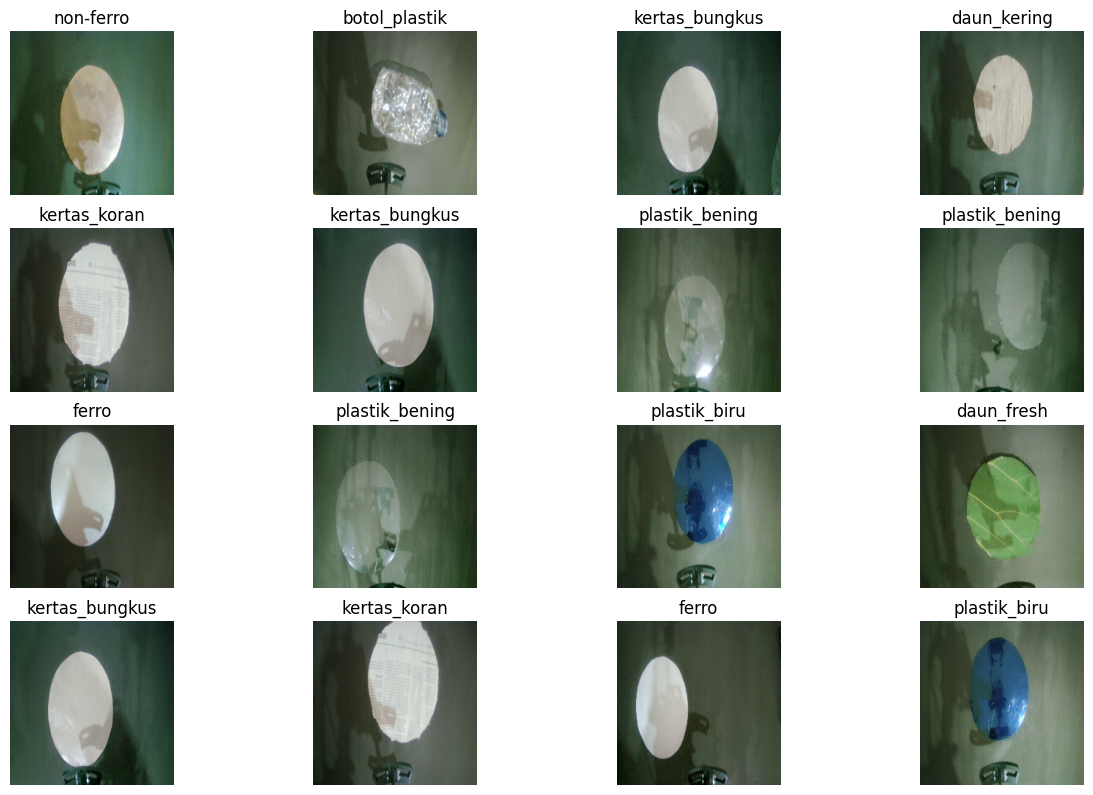

In [ ]:
plt.figure(figsize=(15, 20))
for images, labels in train_img.take(1):
  for i in range(16): # Batch size
    plt.subplot(8, 4, i + 1)
    plt.imshow(images[i]/255)
    plt.title(f"{classes[labels[i].numpy()]}")
    plt.axis(False);

# Cache

In [ ]:
train_ds = train_img.cache().prefetch(tf.data.AUTOTUNE)
val_ds = test_img.cache().prefetch(tf.data.AUTOTUNE)

# Callback and Model

In [ ]:
checkpoint_filepath = "checkpoint/mobilenet"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    save_weight_only=True
)

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
             tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                  patience=5,
                                                  verbose=1),
              checkpoint_callback]

4334752/4334752 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 MobilenetV3small (Function  (None, None, None, 576)   939120    
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 576)               0        

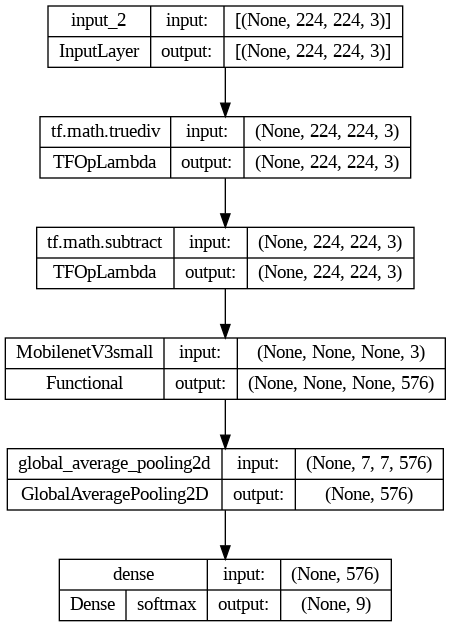

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

# vgg = VGG16(include_top=False)
# vgg.trainable=False

mobilenet = MobileNetV3Small(include_top=False)
mobilenet.trainable = False

inputs = layers.Input(shape=(224,224,3))
x = preprocess_input(inputs)
x = mobilenet(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(len(classes), activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()
plot_model(model, show_shapes=True, show_layer_activations=True)

# Set Loss Function and Optimizer

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'))

# Train Model

In [ ]:
hist = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=300,
    callbacks=callbacks,
)

Epoch 1/300
45/45 [==============================] - 26s 436ms/step - loss: 2.2009 - accuracy: 0.1368 - val_loss: 2.1763 - val_accuracy: 0.1139 - lr: 0.0010
Epoch 2/300
45/45 [==============================] - 15s 344ms/step - loss: 2.1796 - accuracy: 0.2201 - val_loss: 2.1611 - val_accuracy: 0.3139 - lr: 0.0010
Epoch 3/300
45/45 [==============================] - 15s 351ms/step - loss: 2.1641 - accuracy: 0.2465 - val_loss: 2.1451 - val_accuracy: 0.3167 - lr: 0.0010
Epoch 4/300
45/45 [==============================] - 15s 347ms/step - loss: 2.1486 - accuracy: 0.2625 - val_loss: 2.1293 - val_accuracy: 0.3194 - lr: 0.0010
Epoch 5/300
45/45 [==============================] - 17s 381ms/step - loss: 2.1333 - accuracy: 0.2799 - val_loss: 2.1137 - val_accuracy: 0.3222 - lr: 0.0010
Epoch 6/300
45/45 [==============================] - 1s 28ms/step - loss: 2.1181 - accuracy: 0.3014 - val_loss: 2.0983 - val_accuracy: 0.3222 - lr: 0.0010
Epoch 7/300
45/45 [==============================] - 1s 28ms

# Visualize the train and validation accuracy&loss

In [ ]:
import matplotlib.pyplot as plt
def plot_curves(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(history.history['accuracy']))

  plt.title("Train and Val Accuracy")
  plt.plot(epochs, acc, label='training_acc')
  plt.plot(epochs, val_acc, label='val_acc')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(loc="lower right")

  plt.figure()
  plt.title("Train and Val Loss")
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend()

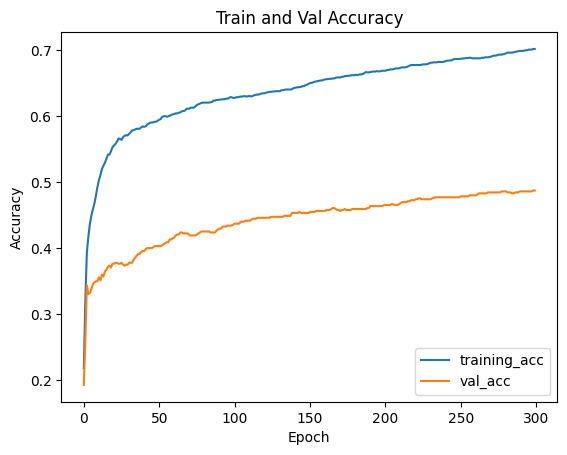

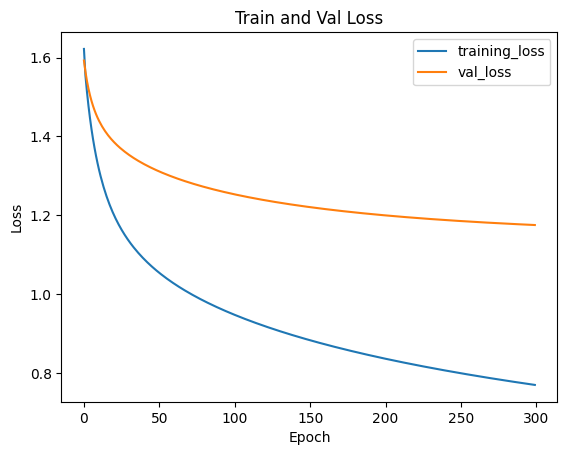

In [ ]:
plot_curves(hist)

# Save model

In [ ]:
model.save('MobileNet_KRTMI.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
from zipfile import ZipFile
from google.colab import files

def zip_folder(folder_path, zip_path):
    """
    Zip a folder and its contents.

    Args:
    - folder_path: Path to the folder to be zipped.
    - zip_path: Path to save the zip file.
    """
    with ZipFile(zip_path, 'w') as zipf:
        # Iterate over all the files in the folder
        for root, _, files in os.walk(folder_path):
            for file in files:
                # Write each file into the zip
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), folder_path))

# Folder yang akan di-zip
folder_to_zip = "/content/datasetKRTMI"

# Path tempat file zip akan disimpan
zip_file_path = "/content/dataTrashKRTMINew.zip"

# Memanggil fungsi zip_folder
zip_folder(folder_to_zip, zip_file_path)

# Download file zip
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Predict an image

1/1 [==============================] - 0s 170ms/step


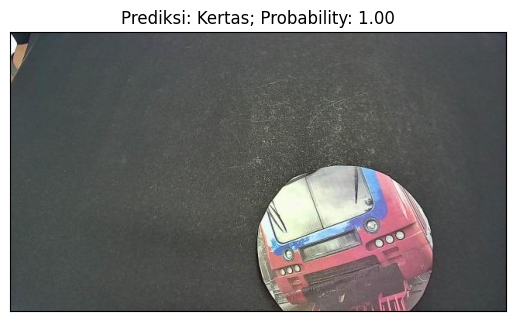

In [ ]:
import cv2 as cv
import numpy as np
import tensorflow as tf


# Load Model
# model = tf.keras.models.load_model('Best_Model.h5')

img_path = '/content/kertas-36-_jpg.].jpg'
image_raw = cv.imread(img_path)
image_raw = cv.cvtColor(image_raw, cv.COLOR_BGR2RGB)
image = cv.resize(image_raw, (224,224))
image = tf.expand_dims(image, axis=0)

# Predict
predict = model.predict(image)
predicted_index = np.argmax(predict, axis=1)
predicted_index = predicted_index[0]
predicted_class = classes[predicted_index]
predicted_prob = predict[0][predicted_index]


plt.imshow(image_raw)
plt.title(f"Prediksi: {predicted_class}; Probability: {predicted_prob:.2f}")
plt.xticks([])
plt.yticks([])
plt.show()